In [1]:
%bookmark -l
%pylab
%matplotlib inline
import sympy as sp
sp.init_session()

Current bookmarks:
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


# Tutorial

Las expresiones no se evalúan por defecto, excepto que se puedan simplificar de forma exacta

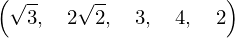

In [2]:
sqrt(3), sqrt(8), sqrt(9), sqrt(16), sqrt(8)/sqrt(2)

Más interesante: se pueden construir expresiones simbólicas basadas en variables

In [3]:
# x, y = Symbols('x y')
expr = x + 2*y
expr = expr + 1
expr = expr - x
expr

Se ha simplificado, pero lo siguiente no

In [4]:
x*(x + 2*y)

Sólo se simplifican las cosas obvias: $x - x=0$, $\sqrt(8)=2\sqrt(2)$ y cosas así. Porque, ¿qué es preferible $x(x+2y)$ o $x^2+2xy$? Pero para pasar de una otra se pueden usar las funciones `expand` y `factor`.

In [5]:
expand(x*(x + 2*y)), factor(x**2+2*x*y)

Algunas features

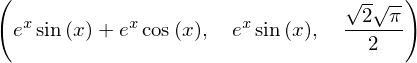

In [6]:
diff(sin(x)*exp(x), x), integrate(exp(x)*sin(x) + exp(x)*cos(x), x), integrate(sin(x**2), (x, -oo, oo))

In [7]:
limit(sin(x)/x, x, 0), solve(x**2+1, x)

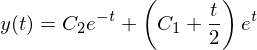

In [8]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

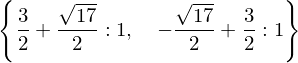

In [9]:
Matrix([[1, 2], [2, 2]]).eigenvals()

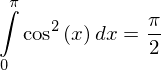

In [10]:
e1 = Integral(cos(x)**2, (x, 0, pi))
Eq(e1, e1.doit())

## Operaciones básicas

### Sustitución
Cambiar todas las instancias de algo por otra cosa

In [11]:
y = symbols('y')
expr = cos(x) + 1
expr.subs(x, y)

Se usa para evaluar una expresión en un punto o para reemplzar una expresión por otra

In [12]:
r, w = symbols('r w')
expr.subs(x, 0), expr.subs(x, r*exp(-I*w))

In [13]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr), expr.subs(sin(2*x), 2*sin(x)*cos(x))

**Importante**: Las expresiones son inmutables, `subs` devuelve otro objeto.

Se pueden hacer sustituciones múltiples:

In [14]:
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

In [15]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(2, 5) if i % 2 == 0]
expr.subs(replacements)

Para evaluar a flotante `evalf`:

In [16]:
sqrt(8).evalf(), pi.evalf(20), cos(2*x).evalf(subs={x:2*pi/4})

In [17]:
(cos(1)**2+sin(1)**2-1).evalf(), (cos(1)**2+sin(1)**2-1).evalf(chop=True)

Para evaluar a flotante cosas simples se usa `subs` o `evalf`; para evaluar de forma más eficiente en más puntos `lambdify`:

In [18]:
f1 = lambdify(x, cos(x), "numpy")
f2 = lambdify(x, cos(x), "math")
def mycos(x):
    return x
f3 = lambdify(x, cos(x), {"cos":mycos})
f1(linspace(0, np.pi, 8)), f2(0.5), f3(0.1)

(array([ 1.        ,  0.90096887,  0.6234898 ,  0.22252093, -0.22252093,
        -0.6234898 , -0.90096887, -1.        ]), 0.8775825618903728, 0.1)

## Simplificación

Hay muchas funciones particulares y una general: `simplify`. Usa heurística para encontrar el resultado más 'simple', pero esto no siempre está definido. Además es más lenta porque prueba todas las opciones.

In [19]:
simplify(sin(x)**2+cos(x)**2), simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)), simplify(gamma(x)/gamma(x - 2))

### Simplificación de polinomios

In [20]:
expand((x + 1)**2), expand((x + 2)*(x - 3)), expand((x + 1)*(x - 2) - (x - 1)*x)

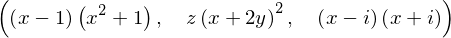

In [21]:
factor(x**3 - x**2 + x - 1), factor(x**2*z + 4*x*y*z + 4*y**2*z), factor(x**2 + 1, gaussian=True)

`expand` y `factor` también funcionan con expresiones no polinómicas pero no es posible asegurar que los factores sean irreducibles (para los polinomios, sí)

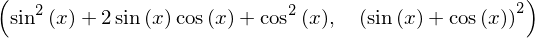

In [22]:
expand((cos(x) + sin(x))**2), factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

In [23]:
collect(x*y + x - 3 + 2*x**2 - z*x**2 + x**3, x), collect(x*y + x - 3 + 2*x**2 - z*x**2 + x**3, x).coeff(x, 2)

### Simplificación de expresiones racionales

`cancel` pone p/q en forma canónica: sin factores comunes y con los primeros coeficientes de p y q enteros

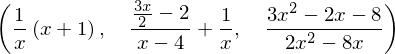

In [24]:
cancel((x**2 + 2*x + 1)/(x**2 + x)), (1/x + (3*x/2 - 2)/(x - 4)), cancel(1/x + (3*x/2 - 2)/(x - 4))

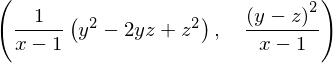

In [25]:
cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)), factor((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

Descomposición en fracciones simples

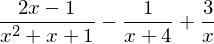

In [26]:
apart((4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x), gaussian=True)

¡OJO con los complejos!

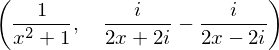

In [27]:
apart(1/((x + I)*(x - I))), apart(1/((x + I)*(x - I)), full=True).doit()

### Simplificación de expresiones trigonométricas e hiperbólicas

Usar `trigsimp` y `expand_trig`; la primera simplifica aplicando identidades trigonométricas y usando heurística; la segunda expande las sumas y los ángulos dobles.

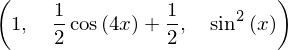

In [28]:
trigsimp(sin(x)**2 + cos(x)**2), trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4), trigsimp(sin(x)*tan(x)/sec(x))

In [29]:
trigsimp(cosh(x)**2 + sinh(x)**2), trigsimp(sinh(x)/tanh(x))

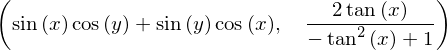

In [30]:
expand_trig(sin(x + y)), expand_trig(tan(2*x))

### Simplificación de expresiones con potencias

## Sección de 2º orden

1. $x^ax^b=x^{a+b}$ siempre se cumple
2. $x^ay^a=(xy)^a$ NO siempre se cumple (ej: $x=y=-1, a=1/2$ resulta $[i \cdot i=i^2=-1]=[\sqrt{1}=1]$); una condición suficiente es que $x,y>=0, a \in \mathcal{R}$
3. $(x^a)^b=x^{ab}$ NO siempre se cumple (ej: $x=-1, a=2, b=1/2$ resulta $[\sqrt{(-1)^2}=1]=[(-1)^1=-1]$); una condición suficiente es que $b \in \mathcal{Z}$
Las simplificaciones sólo se aplican si son ciertas siempre, para lo cual deben cumplirse las asunciones, o se fuerza. Por defecto, los símbolos nuevos son complejos excepto si se restrige con, p.e., `real=True`.

Supongamos:

In [31]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

`powsimp` aplica las identidades 1 y 2 de izqda a derecha:

In [32]:
powsimp(x**a*x**b), powsimp(x**a*y**a), powsimp(t**c*z**c), powsimp(t**c*z**c, force=True)

A veces se aplica automáticamente la 2 si se cumple, por lo que no puede deshacerse con `powsimp`:

In [33]:
sqrt(x*y), powsimp(sqrt(x)*sqrt(y)), (z*t)**2, powsimp(z**2*t**2)

`expand_pow_exp` y `expand_pow_base` aplican las identidades 1 y 2 de izqda a derecha, respectivamente:

In [34]:
expand_power_exp(x**(a + b)), expand_power_base((x*y)**a), expand_power_base((z*t)**c), expand_power_base((z*t)**c, force=True)

Si el exponente es un número la 1 puede aplicarse automáticamente y no se puede deshacer

In [35]:
x**2*x**3, expand_power_exp(x**5)

`powdenest` aplica la 3

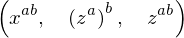

In [36]:
powdenest((x**a)**b), powdenest((z**a)**b), powdenest((z**a)**b, force=True)

In [37]:
a, z = symbols('a, z', complex=True)
r, w, b0 = symbols('r, w, b0', real=True)
a = r*exp(-I*w)

In [38]:
B = b0
A = (1-a*z**-1)*(1-a.conjugate()*z**-1)
H = expand(B/A)

In [39]:
factorial(3.1)

In [40]:
Piecewise((1, x > 0), (S(1)/2, Eq(x, 0)), (0, True))

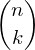

In [41]:
binomial(n, k)